**1.导入需要的库**

In [1]:
import numpy as np #生成数据
from sklearn.tree import DecisionTreeRegressor #回归树
import matplotlib.pyplot as plt #画图

**2.创建一条含有噪声的正弦曲线**

先创建一组随机的、分布在0-5上的横坐标轴的取值(x)，然后将这一组值放到sin函数中去生成纵坐标的值(y)，接着再到y上去添加噪声。

In [2]:
#生成随机数种子，参数1无意义
rng = np.random.RandomState(1)

#生成80行1列的数组（2维，sklearn不能读取1维数据，需要增维），数组中的随机数在5*0到5*1之间
X = 5 * rng.rand(80,1)

X = np.sort(X, axis=0) #将随机数由小到大排序
X

array([[5.71874087e-04],
       [9.14413867e-02],
       [9.68347894e-02],
       [1.36937966e-01],
       [1.95273916e-01],
       [2.49767295e-01],
       [2.66812726e-01],
       [4.25221057e-01],
       [4.61692974e-01],
       [4.91734169e-01],
       [5.11672144e-01],
       [5.16130033e-01],
       [6.50142861e-01],
       [6.87373521e-01],
       [6.96381736e-01],
       [7.01934693e-01],
       [7.33642875e-01],
       [7.33779454e-01],
       [8.26770986e-01],
       [8.49152098e-01],
       [9.31301057e-01],
       [9.90507445e-01],
       [1.02226125e+00],
       [1.05814058e+00],
       [1.32773330e+00],
       [1.40221996e+00],
       [1.43887669e+00],
       [1.46807074e+00],
       [1.51166286e+00],
       [1.56712089e+00],
       [1.57757816e+00],
       [1.72780364e+00],
       [1.73882930e+00],
       [1.98383737e+00],
       [1.98838418e+00],
       [2.07027994e+00],
       [2.07089635e+00],
       [2.08511002e+00],
       [2.08652401e+00],
       [2.09597257e+00],


In [3]:
#将X中的数代入正弦函数
y = np.sin(X)
y.shape#二维，需要降维（单标签问题）

(80, 1)

In [4]:
y = y.ravel() #降维
y.shape #一维

(80,)

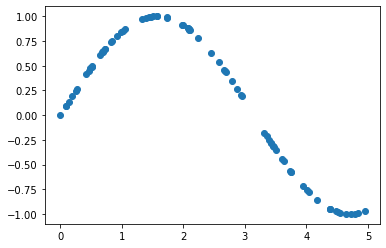

In [5]:
#画图看一下
plt.figure()
plt.scatter(X,y)

In [6]:
'''
给y加噪声
每间隔5取出一个y值，共16个，y[::5]
生成0到1之间的16个随机数，rng.rand(16)
用0.5减去16个随机数，保证有正有负，0.5 - rng.rand(16)
乘以3倍，扩大随机数，(0.5 - rng.rand(16)) * 3
'''

y[::5] = y[::5] + (0.5 - rng.rand(16)) * 3

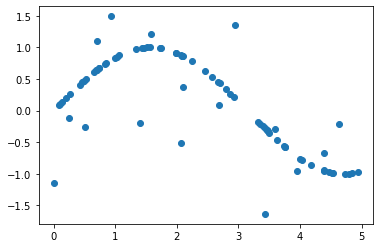

In [7]:
#画图看一下
plt.figure()
plt.scatter(X,y)

**3.实例化&训练模型**

In [8]:
#建模2个
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

**4.测试集导入模型，预测结果**

In [9]:
#生成测试集
X_test = np.arange(0.0, 5.0, 0.01) #生成以0.0开始，以5.0结束，以0.01为步长取数
X_test.shape

(500,)

In [10]:
X_test = X_test[:,np.newaxis] #增维
X_test.shape #500行1列

(500, 1)

In [11]:
#获取预测结果
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [12]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

In [13]:
y_2

array([-1.1493464 , -1.1493464 , -1.1493464 , -1.1493464 , -1.1493464 ,
        0.07894101,  0.07894101,  0.07894101,  0.07894101,  0.07894101,
        0.07894101,  0.07894101,  0.07894101,  0.07894101,  0.07894101,
        0.07894101,  0.07894101,  0.07894101,  0.07894101,  0.07894101,
        0.07894101,  0.07894101,  0.07894101,  0.07894101,  0.07894101,
        0.07894101,  0.39845005,  0.39845005,  0.39845005,  0.39845005,
        0.39845005,  0.39845005,  0.39845005,  0.39845005,  0.39845005,
        0.39845005,  0.39845005,  0.39845005,  0.39845005,  0.39845005,
        0.39845005,  0.39845005,  0.39845005,  0.39845005,  0.39845005,
        0.39845005,  0.39845005,  0.39845005,  0.39845005,  0.39845005,
        0.39845005, -0.26319138,  0.80884013,  0.80884013,  0.80884013,
        0.80884013,  0.80884013,  0.80884013,  0.80884013,  0.80884013,
        0.80884013,  0.80884013,  0.80884013,  0.80884013,  0.80884013,
        0.80884013,  0.80884013,  0.80884013,  0.80884013,  0.80

**5.绘制图像**

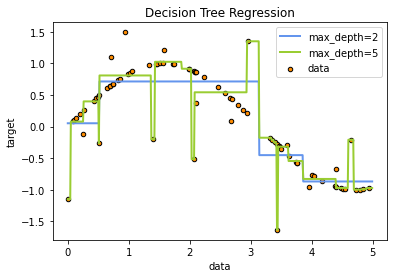

In [14]:
plt.figure() #画布
plt.scatter(X, y, s=20 #点的大小20
           ,edgecolor="black" #边框是黑色
           ,c="darkorange" #点的颜色是深橙色
           ,label="data" #纵坐标的名字
           )
plt.plot(X_test, y_1
        ,color="cornflowerblue" #线的颜色是玉米花蓝色
        ,label="max_depth=2" #线的名字是max_depth=2
        ,linewidth=2 #线的宽度是2
        )
plt.plot(X_test, y_2
        ,color="yellowgreen" #线的颜色是黄绿色
        ,label="max_depth=5" #线的名字是max_depth=5
        ,linewidth=2 #线的宽度是2
        )
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend() #显示图例
plt.show()

max_depth=5过拟合，max_depth=2更接近实际。

**附1：ravel讲解**

In [15]:
np.random.random((2,1))

array([[0.86436868],
       [0.67974652]])

In [16]:
np.random.random((2,1)).ravel()

array([0.80378557, 0.72541237])

In [17]:
np.random.random((2,1)).ravel().shape

(2,)

**附2：newaxis讲解**

In [18]:
l = np.array([1,2,3,4])
l

array([1, 2, 3, 4])

In [19]:
l.shape

(4,)

In [20]:
ll = l[:,np.newaxis]
ll

array([[1],
       [2],
       [3],
       [4]])

In [21]:
ll.shape #4行1列

(4, 1)

In [22]:
lll = l[np.newaxis,:]
lll

array([[1, 2, 3, 4]])

In [23]:
lll.shape #1行4列

(1, 4)